<a href="https://colab.research.google.com/github/LanHuong1598/02VC_Group_9/blob/main/BTL_ML_Group_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [ ]:
# Gộp features và target thành 1 dataframe
df = pd.concat([X, y], axis=1)

# Đổi tên cột target cho dễ đọc
df.rename(columns={'num': 'target'}, inplace=True)

# Kích thước dữ liệu
print("Kích thước dữ liệu:", df.shape)

# Xem 5 dòng đầu
df.head()


Kích thước dữ liệu: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Bộ dữ liệu bao gồm 13 đặc trưng đầu vào và 1 biến mục tiêu. Các đặc trưng này có thể chia thành hai nhóm chính:

Biến số (Numerical): tuổi, huyết áp, cholesterol, nhịp tim,…

Biến phân loại (Categorical): giới tính, loại đau ngực, điện tâm đồ,…

In [ ]:
# Kiểu dữ liệu của các cột
df.dtypes


,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [ ]:
# Kiểm tra số lượng giá trị khuyết
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Kết quả kiểm tra cho thấy bộ dữ liệu chỉ xuất hiện giá trị khuyết tại hai biến ca (4 mẫu) và thal (2 mẫu), chiếm tỷ lệ rất nhỏ so với tổng số quan sát. Các biến còn lại không có giá trị thiếu.

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


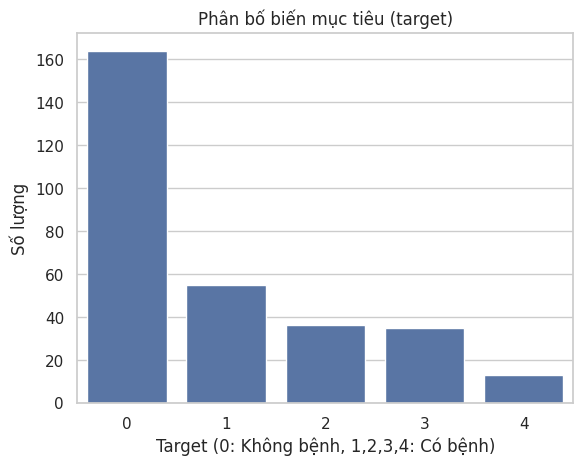

In [ ]:
sns.countplot(x='target', data=df)
plt.title("Phân bố biến mục tiêu (target)")
plt.xlabel("Target (0: Không bệnh, 1,2,3,4: Có bệnh)")
plt.ylabel("Số lượng")
plt.show()



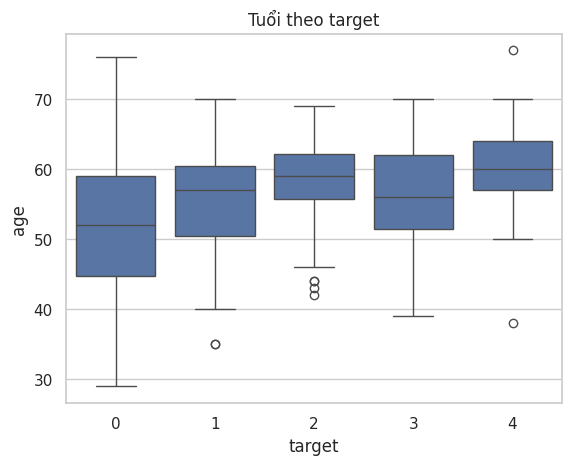

In [ ]:
sns.boxplot(x='target', y='age', data=df)
plt.title("Tuổi theo target")
plt.show()


Nhóm không mắc bệnh có độ tuổi thấp hơn so với các nhóm mắc bệnh, trong khi các mức bệnh nặng tập trung chủ yếu ở nhóm tuổi cao. Mặc dù vẫn tồn tại sự chồng lấn giữa các nhóm, kết quả cho thấy tuổi là một yếu tố nguy cơ quan trọng

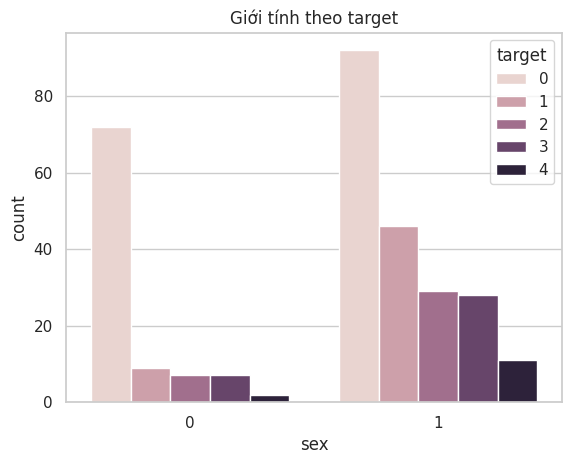

In [ ]:
sns.countplot(x='sex', hue='target', data=df)
plt.title("Giới tính theo target")
plt.show()

Nam giới không chỉ chiếm số lượng mẫu lớn hơn mà còn có tỷ lệ mắc bệnh tim cao hơn đáng kể ở tất cả các mức độ. Trong khi đó, nữ giới chủ yếu thuộc nhóm không mắc bệnh và rất hiếm gặp các trường hợp bệnh nặng. Điều này cho thấy giới tính là một đặc trưng quan trọng và có ảnh hưởng mạnh đến khả năng dự đoán bệnh tim.

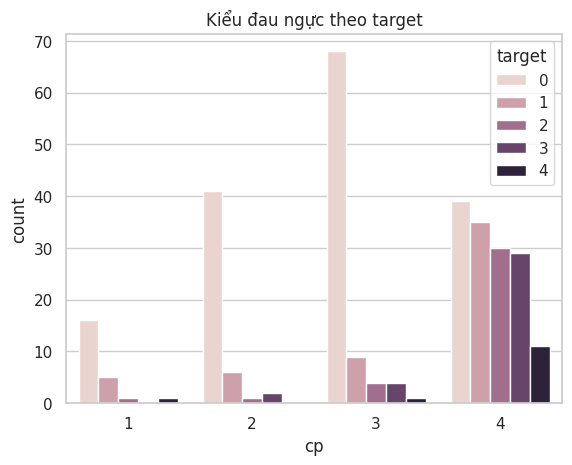

In [ ]:
sns.countplot(x='cp', hue='target', data=df)
plt.title("Kiểu đau ngực theo target")
plt.show()


Biểu đồ cho thấy kiểu đau ngực (cp) có mối quan hệ rõ rệt với mức độ bệnh tim. Đặc biệt, nhóm bệnh nhân không có triệu chứng đau ngực cp = 4 (Asymptomatic)chiếm tỷ lệ cao ở các mức độ bệnh tim nặng, cho thấy đây là một đặc trưng có tính phân biệt cao và cần được ưu tiên trong quá trình huấn luyện mô hình.

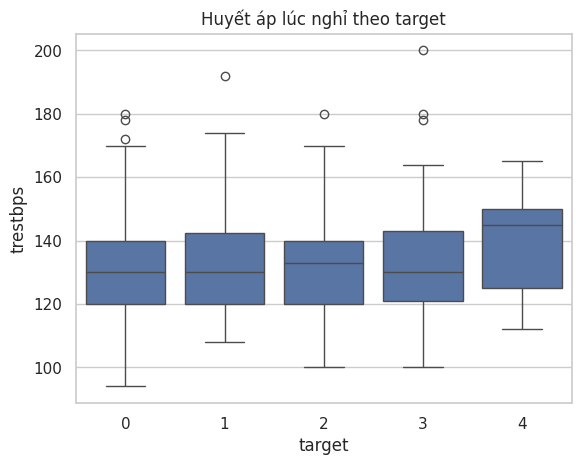

In [ ]:
sns.boxplot(x='target', y='trestbps', data=df)
plt.title("Huyết áp lúc nghỉ theo target")
plt.show()



Huyết áp lúc nghỉ có độ chồng lấn cao giữa các target

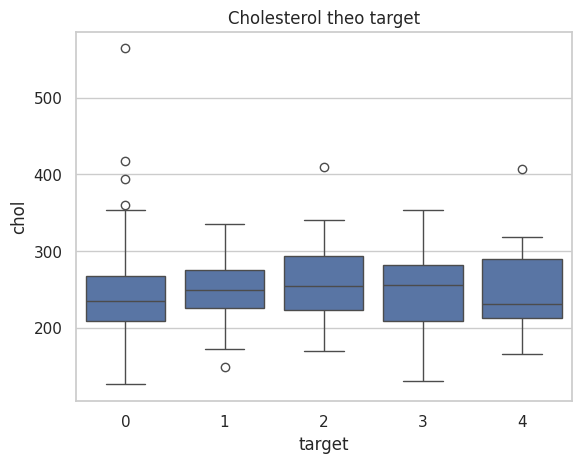

In [ ]:
sns.boxplot(x='target', y='chol', data=df)
plt.title("Cholesterol theo target")
plt.show()


Cholesterol có độ chồng lấn cao giữa các target

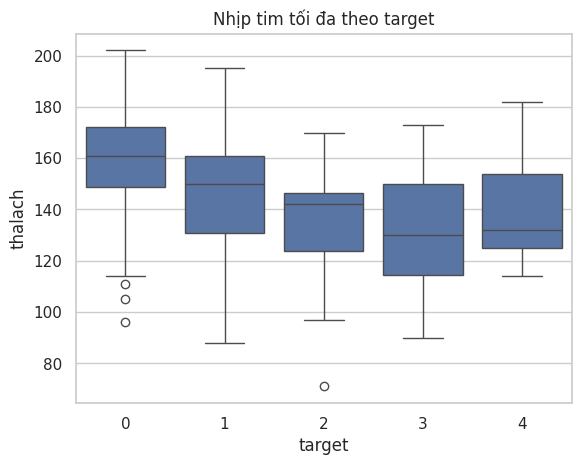

In [ ]:
sns.boxplot(x='target', y='thalach', data=df)
plt.title("Nhịp tim tối đa theo target")
plt.show()


Nhịp tim tối đa đạt được khi gắng sức (thalach) cho thấy mối quan hệ nghịch rõ ràng với mức độ bệnh tim. Bệnh nhân mắc bệnh tim nặng có xu hướng đạt nhịp tim tối đa thấp hơn đáng kể, khiến đặc trưng này trở thành một trong những yếu tố quan trọng nhất cho bài toán dự đoán bệnh tim.

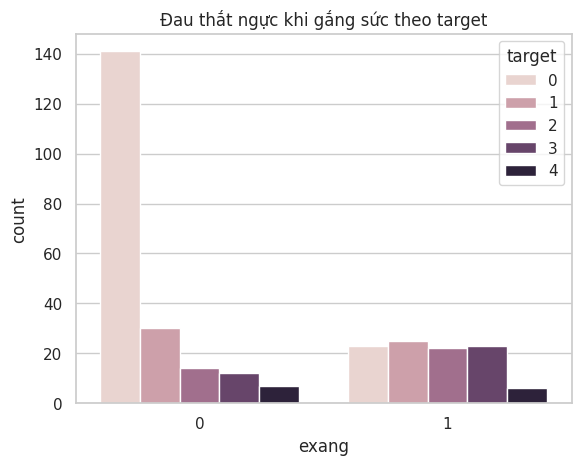

In [ ]:
sns.countplot(x='exang', hue='target', data=df)
plt.title("Đau thắt ngực khi gắng sức theo target")
plt.show()


Khoảng 33% bệnh nhân có đau ngực khi gắng sức. Người bị đau khi gắng sức có xác suất bệnh tim cao hơn

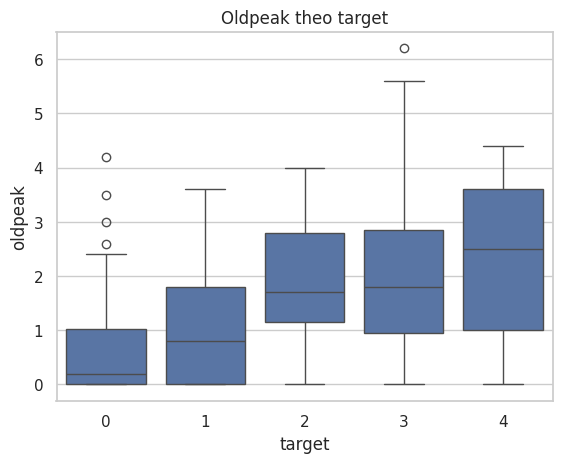

In [ ]:
sns.boxplot(x='target', y='oldpeak', data=df)
plt.title("Oldpeak theo target")
plt.show()


Nhóm có bệnh tim có oldpeak cao hơn rõ rệt,
Đây là đặc trưng mạnh

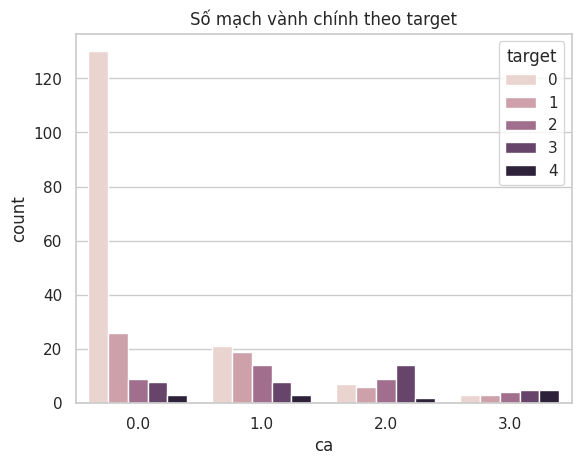

In [ ]:
sns.countplot(x='ca', hue='target', data=df)
plt.title("Số mạch vành chính theo target")
plt.show()


ca = 0 chủ yếu ở nhóm không bệnh; ca ≥ 1 tăng mạnh tỷ lệ bệnh tim

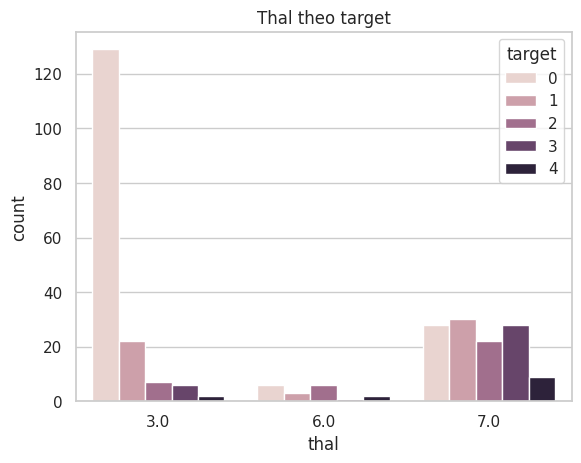

In [ ]:
sns.countplot(x='thal', hue='target', data=df)
plt.title("Thal theo target")
plt.show()


Biến thal cho thấy khả năng phân biệt rõ rệt giữa nhóm không mắc bệnh tim (target=0) và nhóm mắc bệnh (target>0).
Đặc biệt, giá trị thal=3 gắn với trạng thái khỏe mạnh, trong khi thal=7 xuất hiện chủ yếu ở các mức độ bệnh tim.

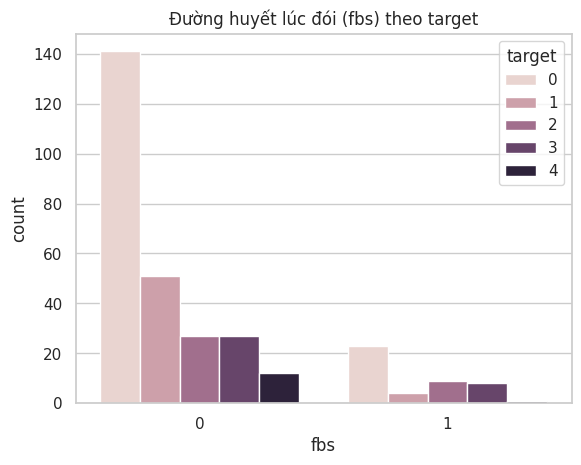

In [ ]:
sns.countplot(x='fbs', hue='target', data=df)
plt.title("Đường huyết lúc đói (fbs) theo target")
plt.show()


Phần lớn bệnh nhân có fbs = 0 (đường huyết bình thường)

Nhóm fbs = 1 chiếm tỷ lệ nhỏ

Phân bố target giữa hai nhóm không khác biệt rõ rệt

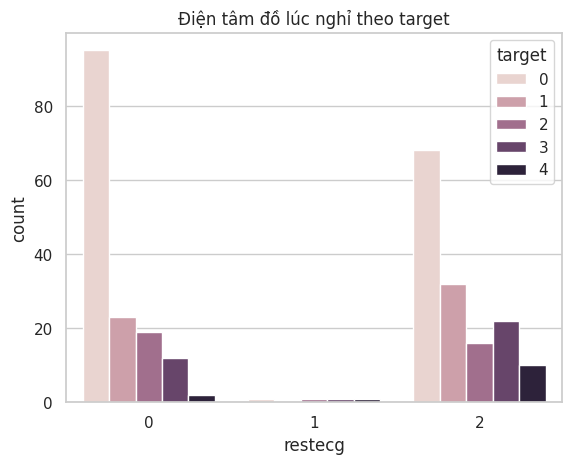

In [ ]:
sns.countplot(x='restecg', hue='target', data=df)
plt.title("Điện tâm đồ lúc nghỉ theo target")
plt.show()


restecg = 0 (bình thường) xuất hiện nhiều nhất

restecg = 1 và 2 xuất hiện nhiều hơn ở các nhóm có bệnh

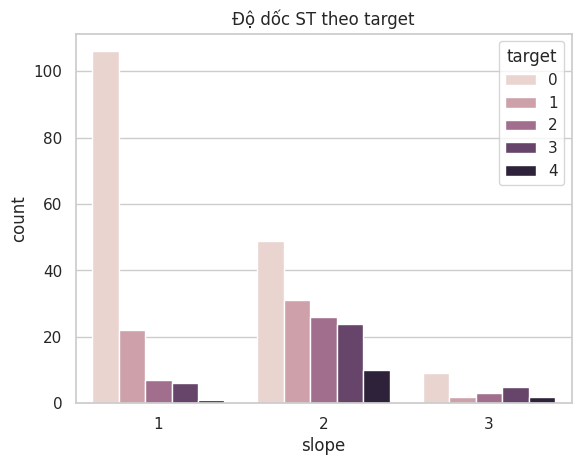

In [ ]:
sns.countplot(x='slope', hue='target', data=df)
plt.title("Độ dốc ST theo target")
plt.show()


slope = 1 (upsloping) chủ yếu xuất hiện ở target = 0

slope = 2 và 3 xuất hiện nhiều ở các nhóm có bệnh

slope = 3 liên quan mạnh đến mức độ bệnh cao

1. Tổng quan bộ dữ liệu

Bộ dữ liệu được sử dụng trong nghiên cứu là Heart Disease Dataset (UCI Machine Learning Repository), gồm 303 mẫu quan sát, mỗi mẫu tương ứng với một bệnh nhân. Dữ liệu bao gồm 13 biến đầu vào phản ánh các đặc điểm lâm sàng, cận lâm sàng và kết quả xét nghiệm tim mạch, cùng 1 biến mục tiêu (target) biểu thị mức độ mắc bệnh tim.

Biến mục tiêu target có giá trị từ 0 đến 4, trong đó:

0: Không mắc bệnh tim

1–4: Các mức độ khác nhau của bệnh tim (từ nhẹ đến nặng)

2. Kiểm tra dữ liệu khuyết

Kết quả kiểm tra số lượng giá trị khuyết cho thấy:

Hầu hết các biến không có dữ liệu thiếu

Riêng biến ca thiếu 4 giá trị

Biến thal thiếu 2 giá trị

3. Nhận xét chung

Từ phân tích EDA, có thể rút ra các kết luận chính:

Một số biến có khả năng phân biệt rất tốt: cp, thalach, oldpeak, slope, ca, thal

Một số biến có ảnh hưởng trung bình: age, sex, restecg, exang

Một số biến có ảnh hưởng thấp: fbs, chol

Các kết quả EDA cho thấy bộ dữ liệu có cấu trúc rõ ràng, phù hợp để áp dụng các mô hình học máy trong bước tiếp theo nhằm dự đoán bệnh tim.

# II. Tiền xử lý dữ liệu


1. Xử lý dữ liệu khuyết

Kết quả phân tích cho thấy:

Biến ca có 4 giá trị khuyết

Biến thal có 2 giá trị khuyết

Do số lượng dữ liệu thiếu rất nhỏ, áp dụng phương pháp thay thế bằng giá trị phổ biến nhất đối với các biến dạng rời rạc.

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df[['ca', 'thal']] = imputer.fit_transform(df[['ca', 'thal']])


2. Xử lý biến mục tiêu (target)
Biến target ban đầu có 5 giá trị (0–4), phản ánh các mức độ khác nhau của bệnh tim.
Để đơn giản hóa bài toán và phù hợp với các mô hình phân loại nhị phân, biến mục tiêu được chuyển đổi như sau:

0: Không mắc bệnh tim

1: Có mắc bệnh tim (gộp các mức 1–4)

In [ ]:
df['target_binary'] = df['target'].apply(lambda x: 0 if x == 0 else 1)


3. Chuẩn hóa dữ liệu


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

df[num_cols] = scaler.fit_transform(df[num_cols])


4. Chia thành 2 tập train và test

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['target', 'target_binary'], axis=1)
y = df['target_binary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
# Việc sử dụng tham số stratify giúp đảm bảo phân bố nhãn lớp đồng đều giữa hai tập.

# 3. Thực nghiệm
# 3.1 BAGGING
# 3.1.1. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200, # số cây trong rừng
    max_depth=None, # Độ sâu tối đa của mỗi cây
    random_state=42 # Giữ kết quả ổn định
)

rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]


In [ ]:
# Chú trọng Recall vì Trong số bệnh nhân thực sự có bệnh, mô hình phát hiện được bao nhiêu.
from sklearn.metrics import recall_score, classification_report, confusion_matrix

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Báo cáo chi tiết
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Recall: 0.8571428571428571

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87        49
           1       0.84      0.86      0.85        42

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



# 3.1.2. Bagging Classifier + SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        kernel='rbf',
        C=1,
        gamma='scale',
        probability=False
    ))
])


In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging_svm = BaggingClassifier(
    estimator=svm,
    n_estimators=30,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)


In [ ]:
bagging_svm.fit(X_train, y_train)


BaggingClassifier(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                            ('svm', SVC(C=1))]),
                  n_estimators=30, n_jobs=-1, random_state=42)

In [ ]:
from sklearn.metrics import recall_score, classification_report

y_pred = bagging_svm.predict(X_test)

recall = recall_score(y_test, y_pred)

print("Recall:", recall)
print(classification_report(y_test, y_pred))


Recall: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.85      0.84      0.85        49
           1       0.81      0.83      0.82        42

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



# 3.2 Boosting
# 3.2.1. AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

# Base learner
base_estimator = DecisionTreeClassifier(
    max_depth=1,
    random_state=42
)

# AdaBoost model
ada = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)

# Train
ada.fit(X_train, y_train)

# Predict
y_pred_ada = ada.predict(X_test)

# Recall
recall_ada = recall_score(y_test, y_pred_ada)
print("Recall AdaBoost:", recall_ada)


Recall AdaBoost: 0.8095238095238095


# 3.2.2. Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train
gb.fit(X_train, y_train)

# Predict
y_pred_gb = gb.predict(X_test)

# Recall
recall_gb = recall_score(y_test, y_pred_gb)
print("Recall Gradient Boosting:", recall_gb)


Recall Gradient Boosting: 0.8095238095238095


# 3.3. Stacking
#3.3.1. Logistic + SVM + Random Forest → Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Base learners
estimators = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('svm', Pipeline([
        ('scaler', StandardScaler()),
        ('svc', SVC(kernel='rbf', probability=True, random_state=42))
    ])),
    ('rf', RandomForestClassifier(
        n_estimators=200,
        random_state=42
    ))
]

# Meta learner
meta_model = LogisticRegression(max_iter=1000)

# Stacking model
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_model,
    cv=5,
    stack_method='predict_proba',
    n_jobs=-1
)

# Huấn luyện
stacking_clf.fit(X_train, y_train)

# Dự đoán
y_pred = stacking_clf.predict(X_test)

# Recall
recall_stacking = recall_score(y_test, y_pred)
print("Recall Stacking (LR + SVM + RF → LR):", recall_stacking)


Recall Stacking (LR + SVM + RF → LR): 0.9285714285714286


# 3.3.2. CNN1 + CNN2 → MLP

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score


In [ ]:
# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Chuẩn hóa
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape cho CNN1D
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


In [ ]:
def build_cnn1(input_shape):
    inp = Input(shape=input_shape)
    x = Conv1D(32, kernel_size=3, activation='relu')(inp)
    x = MaxPooling1D(2)(x)
    x = Flatten()(x)
    x = Dense(32, activation='relu')(x)
    out = Dense(1, activation='sigmoid')(x)

    model = Model(inp, out)
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['Recall']
    )
    return model


In [ ]:
def build_cnn2(input_shape):
    inp = Input(shape=input_shape)
    x = Conv1D(64, kernel_size=3, activation='relu')(inp)
    x = Conv1D(64, kernel_size=3, activation='relu')(x)
    x = MaxPooling1D(2)(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    out = Dense(1, activation='sigmoid')(x)

    model = Model(inp, out)
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['Recall']
    )
    return model


In [ ]:
cnn1 = build_cnn1(X_train_cnn.shape[1:])
cnn2 = build_cnn2(X_train_cnn.shape[1:])

cnn1.fit(X_train_cnn, y_train, epochs=30, batch_size=16, verbose=0)
cnn2.fit(X_train_cnn, y_train, epochs=30, batch_size=16, verbose=0)


In [ ]:
# Xác suất dự đoán
cnn1_train_pred = cnn1.predict(X_train_cnn)
cnn2_train_pred = cnn2.predict(X_train_cnn)

cnn1_test_pred = cnn1.predict(X_test_cnn)
cnn2_test_pred = cnn2.predict(X_test_cnn)

# Ghép lại
X_meta_train = np.hstack([cnn1_train_pred, cnn2_train_pred])
X_meta_test = np.hstack([cnn1_test_pred, cnn2_test_pred])


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
mlp = Sequential([
    Dense(16, activation='relu', input_shape=(X_meta_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

mlp.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['Recall']
)

mlp.fit(X_meta_train, y_train, epochs=30, batch_size=16, verbose=0)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Dự đoán
y_pred_prob = mlp.predict(X_meta_test)
y_pred = (y_pred_prob > 0.5).astype(int)

recall_cnn_stacking = recall_score(y_test, y_pred)
print("Recall CNN1 + CNN2 → MLP:", recall_cnn_stacking)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Recall CNN1 + CNN2 → MLP: 0.9285714285714286


| Nhóm         | Mô hình                | Recall     |
| ------------ | ---------------------- | ---------- |
| Bagging      | Random Forest          | 0.8571     |
| Bagging      | Bagging + SVM          | 0.8333     |
| Boosting     | AdaBoost               | 0.8095     |
| Boosting     | Gradient Boosting      | 0.8095     |
| **Stacking** | **LR + SVM + RF → LR** | **0.9286** |
| **Stacking** | **CNN1 + CNN2 → MLP**  | **0.9286** |
